# Deflection of a Membrane


$-\nabla^2w = p$

$p = 4 e^{-\beta ^2 (x^2+(y-R_0)^2))}$


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from fenics import *
from mshr import *

## Define the mesh

In [4]:
#Circule shape at (0.0) and radius 1
domain = Circle(Point(0,0),1)
#Second argument is the resolution
mesh = generate_mesh(domain, 64)

## Defining the load

In [5]:
#Parameters for p
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta,2)*(pow(x[0],2)+pow(x[1]-R0,2)))', degree = 1, beta = beta, R0 = R0)

In [6]:
#Update parameters
p.beta = 12
p.R0 = 0.3

## Defining the variational problem

In [7]:
#Function space
V = FunctionSpace(mesh, 'P', 2)

# Define boundary condition
w_D = w_D = Constant(0)


def boundary(x, on_boundary):
    return on_boundary


bc = DirichletBC(V, w_D, boundary)

w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx

w = Function(V)
solve(a == L, w, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.


## Plotting solution

In [8]:
#Transform the Expression to Finite element function
p = interpolate(p, V)

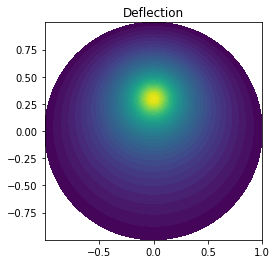

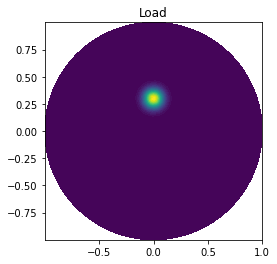

In [15]:
%matplotlib inline
plot(w, title = "Deflection")
plt.show()
plot(p, title = "Load")

## Export solution to SVK files

In [13]:
vtkfile_w = File('poisson_membrane/deflection.pvd')
vtkfile_w << w
vtkfile_p = File('poisson_membrane/load.pvd')
vtkfile_p << p

# Errors

In [16]:
# Compute error in L2 norm
error_L2 = errornorm(w_D, w, 'L2')

# Compute maximum error at vertices
vertex_value_w_D = w_D.compute_vertex_values(mesh)
vertex_value_w = w.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_value_w_D - vertex_value_w))

# Print errors
print('Error L2:', error_L2)
print('Error max:', error_max)

Error L2: 0.015838628871960414
Error max: 0.0370942947675


## Plot curves through the domain

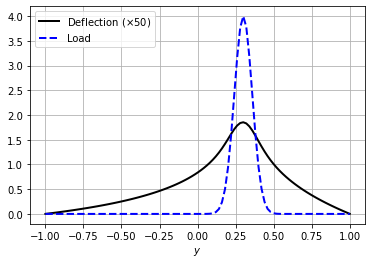

In [21]:
# Curve plot along x = 0 comparing p and w
tol = 0.001 # avoid hitting points outside the domain

y = np.linspace(-1 + tol, 1 - tol, 101)
points = [(0, y_) for y_ in y] # 2D points

w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])

plt.plot(y, 50*w_line, 'k', linewidth=2) # magnify w
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')
plt.savefig('poisson_membrane/curves.pdf')
plt.savefig('poisson_membrane/curves.png')